__Problem Statement:__ A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

● A sizable department has to be maintained, for the purposes of recruiting new talent<br/>
● More often than not, the new employees have to be trained for the job and/or given time to
acclimatize themselves to the company<br/>
● Hence, the management has contracted an HR analytics firm to understand what factors they
should focus on, in order to curb attrition.<br/>
● In other words, they want to know what changes they should make to their workplace, in order to
get most of their employees to stay.<br/>
● Also, they want to know which of these variables is most important and needs to be addressed
right away.<br/>

Since you are one of the star analysts at the firm, this project has been given to you.

Goal of the case study You are required to model the probability of attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

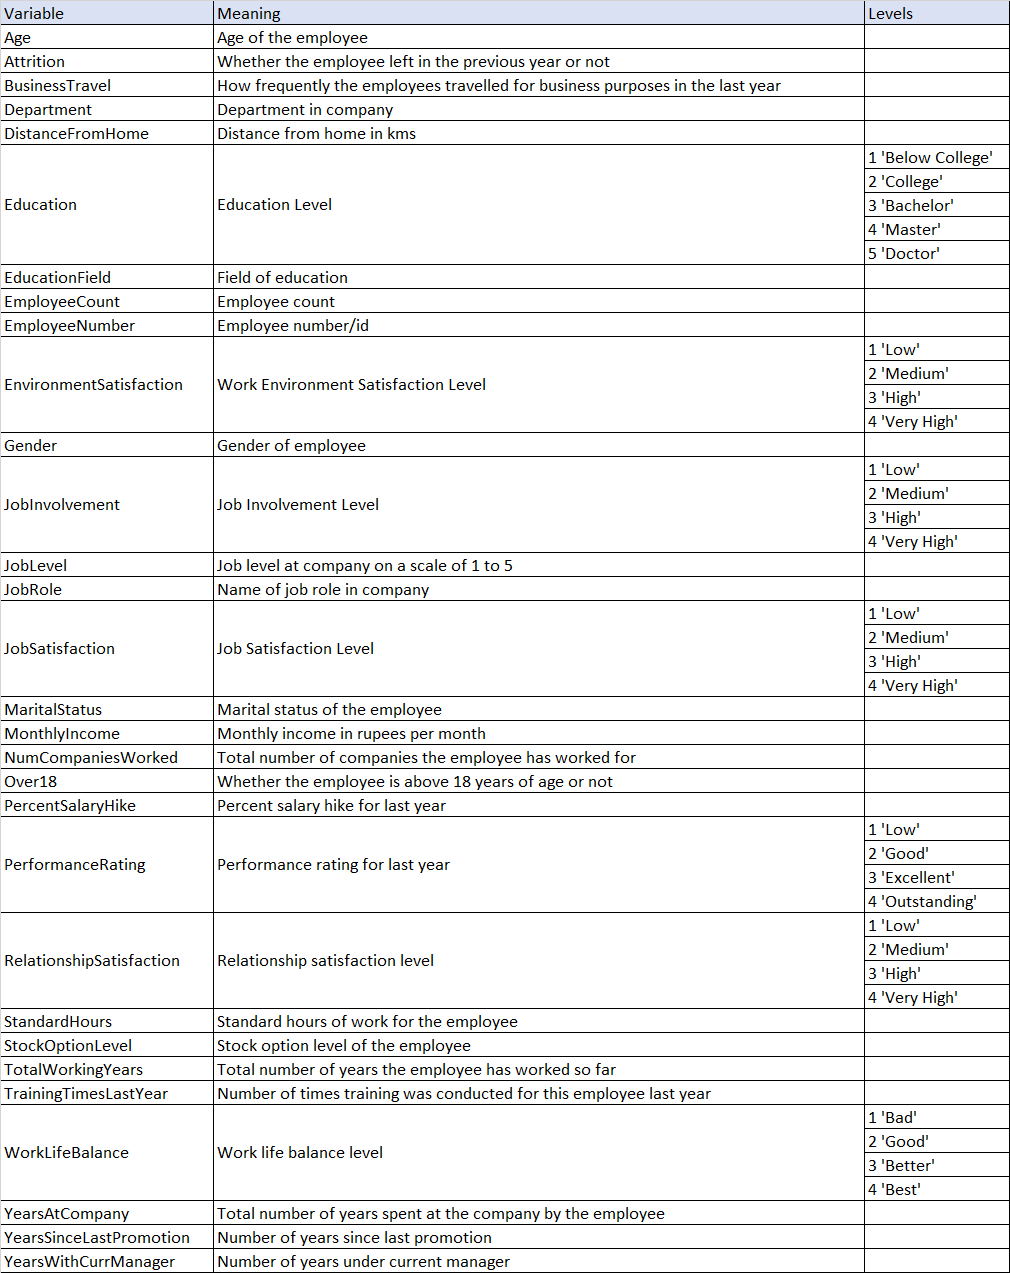

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#load data
data = pd.read_csv('general_data.csv')
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [84]:
data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [2]:
len(data)

4410

In [3]:
df = data.sample(100)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
3902,36,No,Travel_Rarely,Human Resources,1,4,Life Sciences,1,3903,Female,3,Research Scientist,Single,41070,3.0,Y,11,8,1,17.0,2,13,6,7
1086,37,No,Travel_Rarely,Research & Development,7,2,Medical,1,1087,Male,1,Manufacturing Director,Married,20110,5.0,Y,13,8,0,16.0,4,5,0,4
3931,29,Yes,Travel_Rarely,Sales,4,3,Marketing,1,3932,Male,5,Research Scientist,Single,36910,1.0,Y,13,8,0,2.0,3,2,2,2
3014,54,No,Travel_Frequently,Research & Development,1,4,Life Sciences,1,3015,Male,2,Research Scientist,Single,29330,3.0,Y,12,8,2,20.0,2,4,0,3
3662,31,Yes,Travel_Frequently,Research & Development,2,2,Medical,1,3663,Female,2,Manufacturing Director,Single,53960,7.0,Y,17,8,1,3.0,2,1,0,0


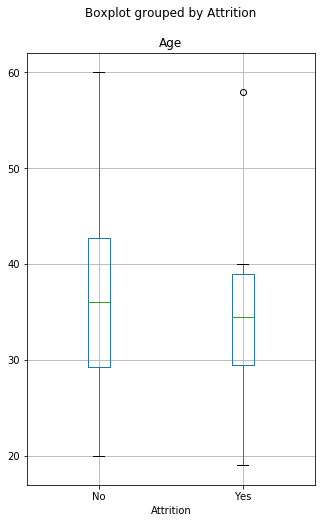

In [15]:
df.boxplot(['Age'], by='Attrition', figsize=(5, 8));

In [19]:
df[df['Attrition'] == 'Yes']['Age'].describe()

count    10.000000
mean     35.200000
std      10.239358
min      19.000000
25%      29.500000
50%      34.500000
75%      39.000000
max      58.000000
Name: Age, dtype: float64

In [17]:
df[df['Attrition'] == 'No']['Age'].describe()

count    90.000000
mean     36.822222
std       9.196455
min      20.000000
25%      29.250000
50%      36.000000
75%      42.750000
max      60.000000
Name: Age, dtype: float64

In [23]:
df[df['Attrition'] == 'No']['BusinessTravel'].value_counts()

Travel_Rarely        70
Travel_Frequently    11
Non-Travel            9
Name: BusinessTravel, dtype: int64

In [24]:
df[df['Attrition'] == 'Yes']['BusinessTravel'].value_counts()

Travel_Rarely        8
Travel_Frequently    2
Name: BusinessTravel, dtype: int64

In [34]:
df[df['Attrition'] == 'Yes']['Gender'].value_counts()

Male      6
Female    4
Name: Gender, dtype: int64

In [35]:
df[df['Attrition'] == 'No']['Gender'].value_counts()

Male      59
Female    31
Name: Gender, dtype: int64

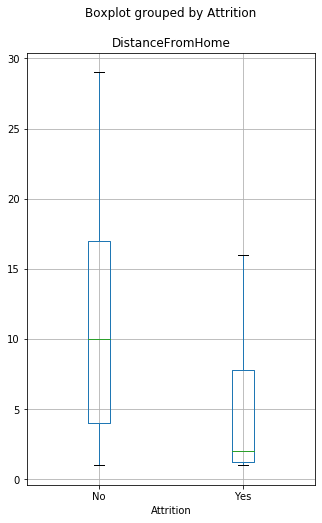

In [28]:
df.boxplot(['DistanceFromHome'], by='Attrition', figsize=(5, 8));

In [30]:
df[df['Attrition'] == 'Yes']['DistanceFromHome'].describe()

count    10.000000
mean      5.300000
std       5.888784
min       1.000000
25%       1.250000
50%       2.000000
75%       7.750000
max      16.000000
Name: DistanceFromHome, dtype: float64

In [31]:
df[df['Attrition'] == 'No']['DistanceFromHome'].describe()

count    90.000000
mean     11.277778
std       8.564400
min       1.000000
25%       4.000000
50%      10.000000
75%      17.000000
max      29.000000
Name: DistanceFromHome, dtype: float64

__Hypothesis Statement 1:__ The average distance from home of the employees who left the company is 5 unit.

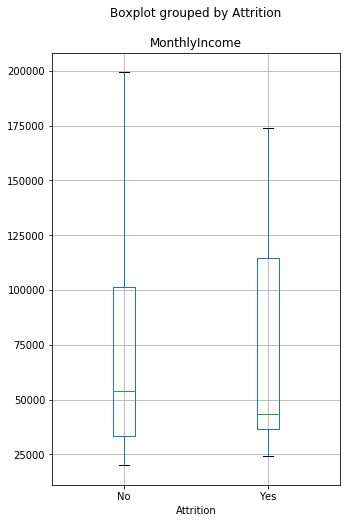

In [39]:
df.boxplot(['MonthlyIncome'], by='Attrition', figsize=(5, 8));

In [85]:
df[df['Attrition'] == 'Yes']['MonthlyIncome'].describe()

count        10.000000
mean      74437.000000
std       57902.884797
min       24130.000000
25%       36775.000000
50%       43345.000000
75%      114732.500000
max      173990.000000
Name: MonthlyIncome, dtype: float64

In [38]:
df[df['Attrition'] == 'No']['MonthlyIncome'].describe()

count        90.000000
mean      70027.222222
std       45944.255868
min       20080.000000
25%       33372.500000
50%       53980.000000
75%      101262.500000
max      199260.000000
Name: MonthlyIncome, dtype: float64

__Hypothesis Statement 2:__ The average monthly salary of the employees who left the company is 75000.

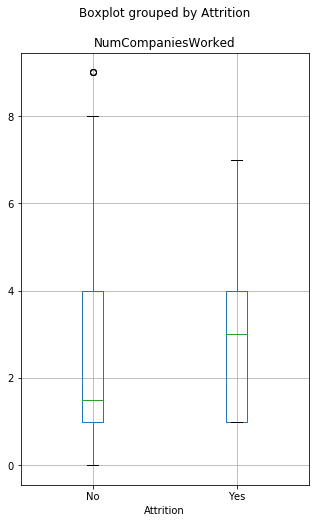

In [42]:
df.boxplot(['NumCompaniesWorked'], by='Attrition', figsize=(5, 8));

In [40]:
df[df['Attrition'] == 'Yes']['NumCompaniesWorked'].describe()

count    10.00000
mean      3.10000
std       2.18327
min       1.00000
25%       1.00000
50%       3.00000
75%       4.00000
max       7.00000
Name: NumCompaniesWorked, dtype: float64

In [41]:
df[df['Attrition'] == 'No']['NumCompaniesWorked'].describe()

count    90.000000
mean      2.788889
std       2.598593
min       0.000000
25%       1.000000
50%       1.500000
75%       4.000000
max       9.000000
Name: NumCompaniesWorked, dtype: float64

__Hypothesis Statement 3:__ The average number of companies where the employees who left the company previously worked is greater than equal to 3.

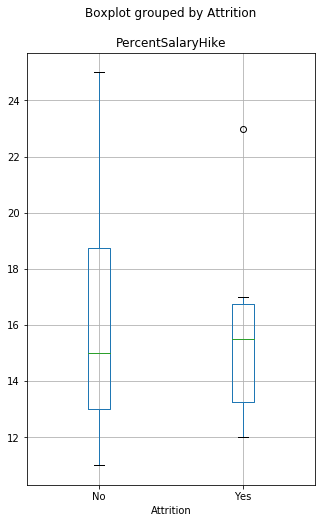

In [43]:
df.boxplot(['PercentSalaryHike'], by='Attrition', figsize=(5, 8));

In [44]:
df[df['Attrition'] == 'Yes']['PercentSalaryHike'].describe()

count    10.000000
mean     15.600000
std       3.134042
min      12.000000
25%      13.250000
50%      15.500000
75%      16.750000
max      23.000000
Name: PercentSalaryHike, dtype: float64

In [45]:
df[df['Attrition'] == 'No']['PercentSalaryHike'].describe()

count    90.000000
mean     15.844444
std       3.879972
min      11.000000
25%      13.000000
50%      15.000000
75%      18.750000
max      25.000000
Name: PercentSalaryHike, dtype: float64

__Hypothesis Statement 4:__ The average percent salary hike of the employees who left the company is less than equal to 15.5.

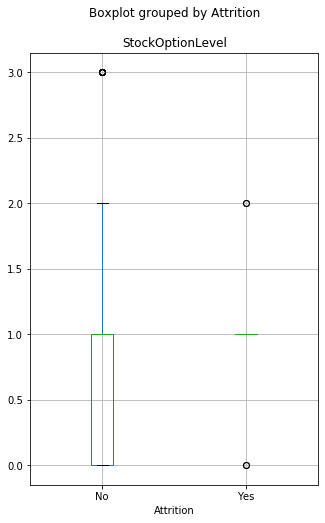

In [49]:
df.boxplot(['StockOptionLevel'], by='Attrition', figsize=(5, 8));

In [87]:
df[df['Attrition'] == 'Yes']['StockOptionLevel'].describe()

count    10.000000
mean      1.000000
std       0.666667
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: StockOptionLevel, dtype: float64

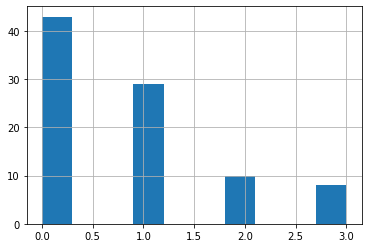

In [54]:
df[df['Attrition'] == 'No']['StockOptionLevel'].hist();

__Hypothesis Statement 5:__ The average Stock Option Level of the employees who left the company is 1.

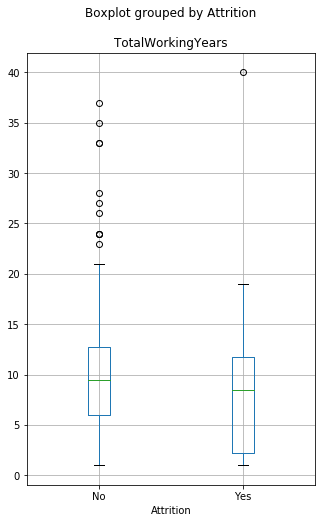

In [55]:
df.boxplot(['TotalWorkingYears'], by='Attrition', figsize=(5, 8));

In [60]:
df[df['Attrition'] == 'Yes']['TotalWorkingYears'].describe()

count    10.000000
mean     10.600000
std      11.862171
min       1.000000
25%       2.250000
50%       8.500000
75%      11.750000
max      40.000000
Name: TotalWorkingYears, dtype: float64

In [61]:
df[df['Attrition'] == 'No']['TotalWorkingYears'].describe()

count    90.000000
mean     11.166667
std       8.049356
min       1.000000
25%       6.000000
50%       9.500000
75%      12.750000
max      37.000000
Name: TotalWorkingYears, dtype: float64

__Hypothesis Statement 6:__ The average number of working years of the employees who left the company is less than equal to 10.

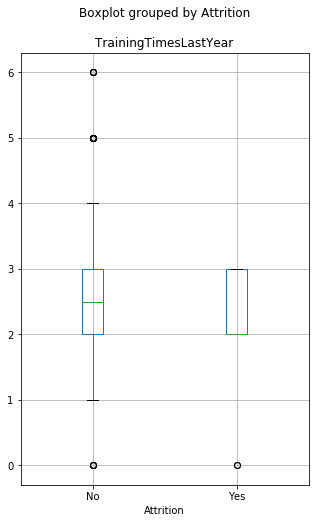

In [62]:
df.boxplot(['TrainingTimesLastYear'], by='Attrition', figsize=(5, 8));

In [63]:
df[df['Attrition'] == 'Yes']['TrainingTimesLastYear'].describe()

count    10.000000
mean      2.000000
std       1.154701
min       0.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: TrainingTimesLastYear, dtype: float64

In [64]:
df[df['Attrition'] == 'No']['TrainingTimesLastYear'].describe()

count    90.000000
mean      2.833333
std       1.359527
min       0.000000
25%       2.000000
50%       2.500000
75%       3.000000
max       6.000000
Name: TrainingTimesLastYear, dtype: float64

__Hypothesis Statement 7:__ The average number of trainings the employees who left the company attended last year is 2.

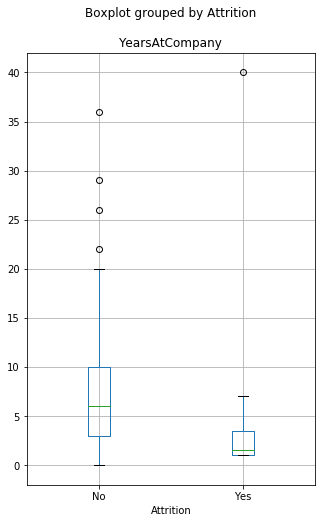

In [65]:
df.boxplot(['YearsAtCompany'], by='Attrition', figsize=(5, 8));

In [88]:
df[df['Attrition'] == 'Yes']['YearsAtCompany'].describe()

count    10.000000
mean      6.000000
std      12.101423
min       1.000000
25%       1.000000
50%       1.500000
75%       3.500000
max      40.000000
Name: YearsAtCompany, dtype: float64

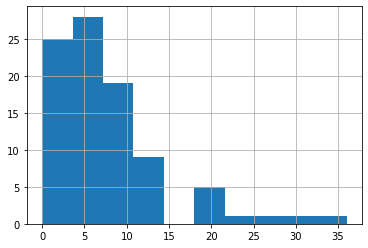

In [70]:
df[df['Attrition'] == 'No']['YearsAtCompany'].hist();

__Hypothesis Statement 8:__ The average number of years the employees who left the company were with the company is less than equal to 5.

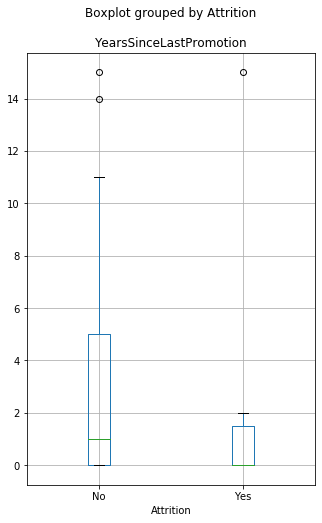

In [71]:
df.boxplot(['YearsSinceLastPromotion'], by='Attrition', figsize=(5, 8));

In [89]:
df[df['Attrition'] == 'Yes']['YearsSinceLastPromotion'].describe()

count    10.000000
mean      1.900000
std       4.677369
min       0.000000
25%       0.000000
50%       0.000000
75%       1.500000
max      15.000000
Name: YearsSinceLastPromotion, dtype: float64

__Hypothesis Statement 9:__ The average number of years since the last promotion of the employees who left the company is less than equal to 2.

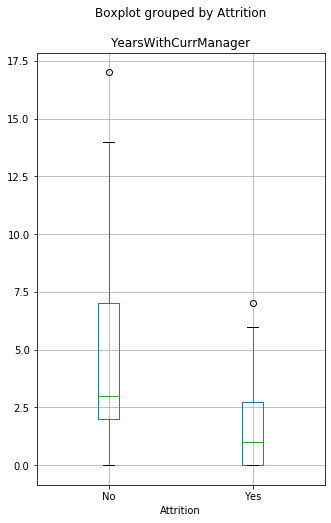

In [77]:
df.boxplot(['YearsWithCurrManager'], by='Attrition', figsize=(5, 8));

In [90]:
df[df['Attrition'] == 'Yes']['YearsWithCurrManager'].describe()

count    10.000000
mean      2.000000
std       2.624669
min       0.000000
25%       0.000000
50%       1.000000
75%       2.750000
max       7.000000
Name: YearsWithCurrManager, dtype: float64

__Hypothesis Statement 10:__ The average number of years the employees who left the company were with their current managers is less than equal to 2.